# Submitted by: **TIZON, Eula Kathrina M.**

# 1. Data Exploration and Preprocessing (10 points):
* Load the dataset and perform basic exploratory data analysis (EDA).
* Identify and analyze the types of missing data (MCAR, MAR, MNAR) based on domain knowledge and statistical tests.
* Justify your choice of missing data handling technique based on the identified type of missing data.
* Handle missing values using appropriate techniques (e.g., imputation, deletion).
* Analyze the distribution of features and target variables.
* Normalize or standardize numerical features as needed.
* Encode categorical features using suitable methods (e.g., one-hot encoding, label encoding).

### Importing libraries

We first import various libraries necessary for data analysis and preprocessing.

In [ ]:
!pip install gdown

import gdown
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

from scipy.stats import shapiro, skew, chi2_contingency
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE, RFECV, chi2, mutual_info_classif
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Loading the dataset

Next, we define the Google Drive file ID and construct the download URL. We then call the gdown.download function to download the dataset as 'MBA 2.csv'.

In [ ]:
file_id = '1nylcMhQikNjRlkNLzqyZMHgBnRvU88mZ'
url = f'https://drive.google.com/uc?id={file_id}'
gdown.download(url, 'MBA 2.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1nylcMhQikNjRlkNLzqyZMHgBnRvU88mZ
To: /content/MBA 2.csv
100%|██████████| 361k/361k [00:00<00:00, 22.6MB/s]


'MBA 2.csv'

We proceed to load the dataset into a Pandas DataFrame named df.

In [ ]:
df = pd.read_csv('MBA 2.csv')

Let us view the DataFrame to check if it was loaded correctly.

In [ ]:
df

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN
...,...,...,...,...,...,...,...,...,...,...
6189,6190,Male,False,3.49,Business,White,640.0,5.0,Other,NaN
6190,6191,Male,False,3.18,STEM,Black,670.0,4.0,Consulting,NaN
6191,6192,Female,True,3.22,Business,NaN,680.0,5.0,Health Care,Admit
6192,6193,Male,True,3.36,Business,NaN,590.0,5.0,Other,NaN


### Exploratory data analysis

Let us check the size of the DataFrame. Based on the output below, the DataFrame has 6194 rows and 10 columns.

In [ ]:
df.shape

(6194, 10)

Using info() helps us quickly assess the overall structure of the dataset, identify data types, and pinpoint any potential issues with missing values. Based on the output below, the race and admission columns have null values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


We check for duplicate rows in the data frame, counting the number of duplicate entries. The output shows that there are 0 duplicates in the DataFrame, which indicates that each application is uniquely represented.

In [ ]:
df.duplicated().sum()

0

We remove the application_id column from the DataFrame since it is a unique identifier that does not provide predictive value for the analysis or modeling tasks.

In [ ]:
df = df.drop(columns=['application_id'])

### Handling missing data

We check for missing values in the DataFrame, counting the number of null entries in each column. Based on the output below, the race column has 1842 missing values, indicating a notable portion of international students without a recorded racial background. Also, the admission column has 5194 missing values.

In [ ]:
df.isnull().sum()

,0
gender,0
international,0
gpa,0
major,0
race,1842
gmat,0
work_exp,0
work_industry,0
admission,5194


The missing values in the admission column can be classified as Missing Completely At Random (MCAR). This classification is based on the understanding that the absence of admission status is not influenced by any specific characteristics of the applicants; rather, it signifies that decisions were not recorded. Based on the description of variables in the original source, null values in admission means that the applicant was denied. Hence, we fill the missing values in the admission column with the value 'Deny'.

In [ ]:
df['admission'] = df['admission'].fillna('Deny')

We check the remaining missing values. After filling the admission column, the race column still has 1842 missing values, which we need to address.

In [ ]:
df.isnull().sum()

,0
gender,0
international,0
gpa,0
major,0
race,1842
gmat,0
work_exp,0
work_industry,0
admission,0


Analyzing the missing race values, we filter the DataFrame to create a new DataFrame null_race that contains only the entries with missing values in the race column. We then count the number of occurrences of each value in the international column for these entries. Based on the output below, all entries with missing values in the race column are international students (where international is True). This suggests that the missing data is likely Missing Not At Random (MNAR) since the absence of racial background information correlates with being an international student.

In [ ]:
null_race = df[df['race'].isnull()]

null_race['international'].value_counts()

,count
international,
True,1842


There are exactly 1842 True values for international, further confirming that the variable 'race' was left blank if 'international' is True.

In [ ]:
df['international'].value_counts()

,count
international,
False,4352
True,1842


We then proceed with handling the missing values for race. Since they are Missing Not At Random (MNAR), we can use Random Forest as a predictive model. This method uses available information in other features to infer the missing racial backgrounds, resulting in a more informed imputation. In order to do Random Forest, we need to label encode our categorical features.

#### Encoding of categorical features

We convert the international column from boolean values to integers (0 for False and 1 for True). Converting categorical variables to integer format is a common preprocessing step for machine learning, as many algorithms require numerical input.

In [ ]:
df['international'] = df['international'].astype(int)

We also create label encoders for the other categorical columns, converting them into numerical format suitable for modeling.

In [ ]:
label_encoders = {}
for column in ['gender', 'major', 'work_industry', 'admission']:
  le = LabelEncoder()
  df[column] = df[column].astype(str)
  df[column] = le.fit_transform(df[column])
  label_encoders[column] = le

We convert the race column to a categorical type and create a new column race_code with numerical codes.

In [ ]:
df['race'] = df['race'].astype('category')
df['race_code'] = df['race'].cat.codes

We then separate the DataFrame into training data (with known race values) and testing data (with missing race values), since that is what we want to predict in order to fill in the missing values.

In [ ]:
train_df = df[df['race'].notna()]
test_df = df[df['race'].isna()]

We define features X and target y for training a Random Forest model to predict the missing race values.

In [ ]:
X = train_df.drop(['race', 'race_code'], axis=1)
y = train_df['race_code']

We fit the model on the training data and use it to predict the missing values in the test set.

In [ ]:
model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

In [ ]:
X_test = test_df.drop(['race', 'race_code'], axis=1)
predicted_race = model.predict(X_test)

Finally, we map the predicted numerical values back to their original categories in the race column and drop the race_code column.

In [ ]:
race_mapping = dict(enumerate(df['race'].cat.categories))
df.loc[df['race'].isna(), 'race'] = [race_mapping[i] for i in predicted_race]

In [ ]:
df.drop(['race_code'], axis=1, inplace=True)

#### Encoding of categorical features

We again use LabelEncoder to convert the race column to numerical format after imputation. Re-encoding ensures that the race feature is consistently represented as numerical data, allowing for seamless integration into modeling.

In [ ]:
le_race = LabelEncoder()
df['race'] = le_race.fit_transform(df['race'])
label_encoders['race'] = le_race

Checking below, there are no more null values in the DataFrame. All missing values have been addressed.

In [ ]:
df.isnull().sum()

,0
gender,0
international,0
gpa,0
major,0
race,0
gmat,0
work_exp,0
work_industry,0
admission,0


### Visualizing distributions

For proper labeling in the visualizations, let us temporarily inverse transform the label encoded categorical features.

In [ ]:
for column in label_encoders:
    df[column] = label_encoders[column].inverse_transform(df[column])

df['international'] = df['international'].replace({1: 'Yes', 0: 'No'})

We visualize the distribution of each categorical variable by generating count plots. For each categorical column, we create a figure and use sns.countplot() to display the counts of unique categories.

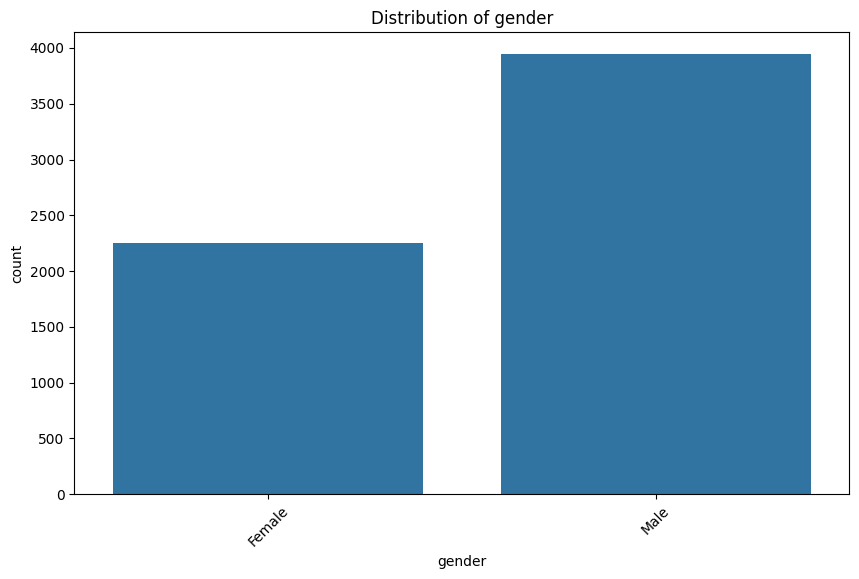

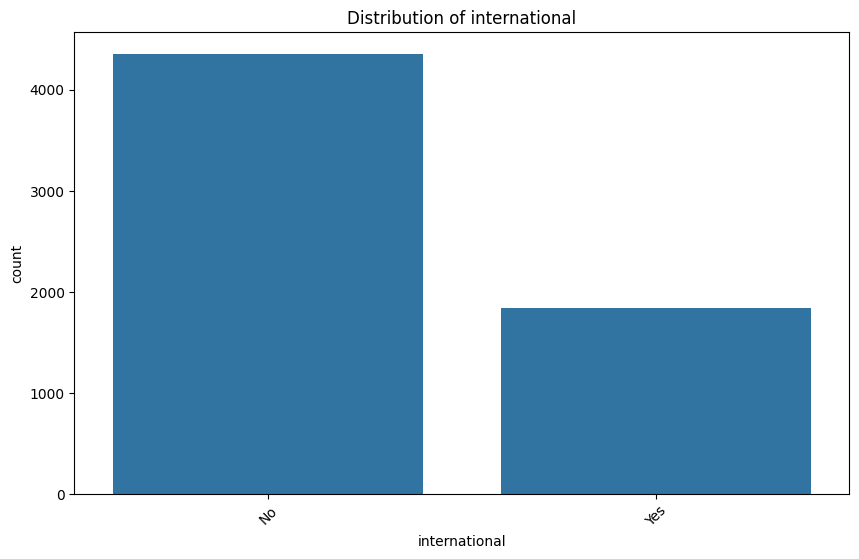

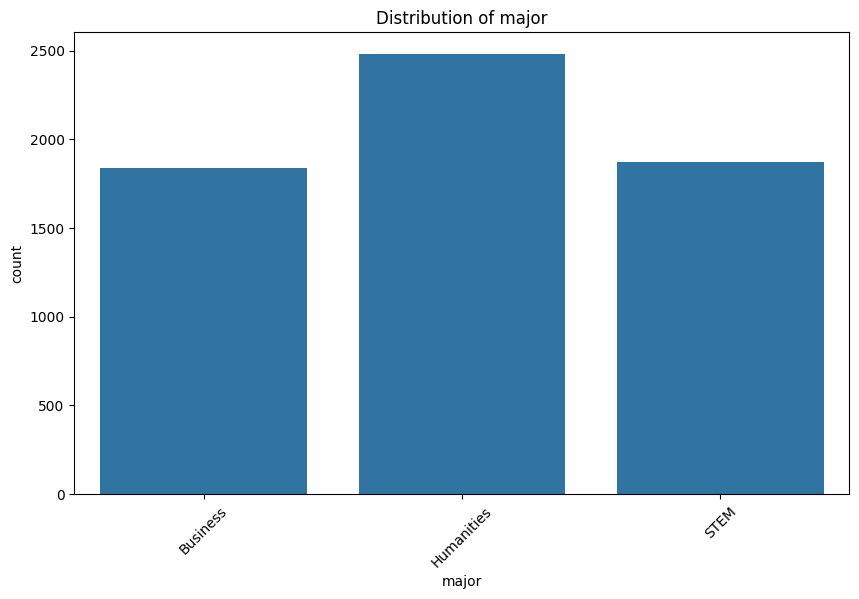

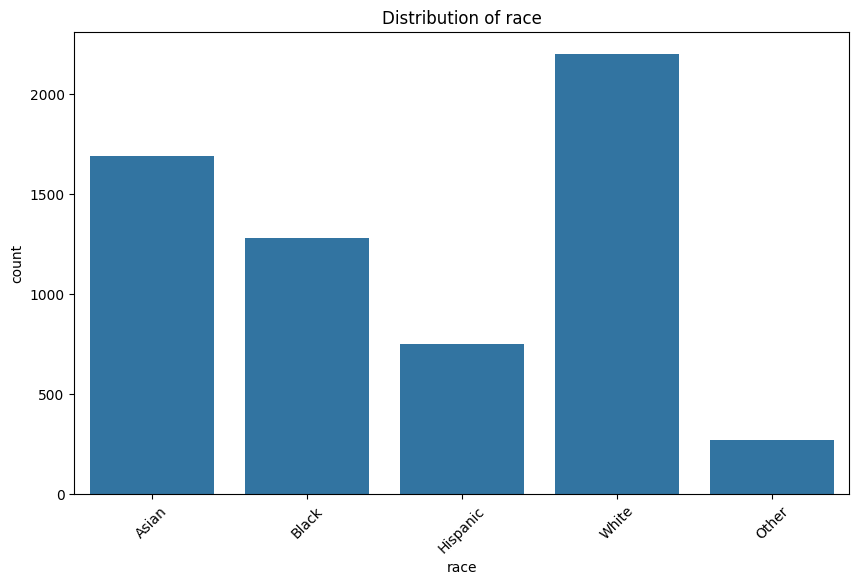

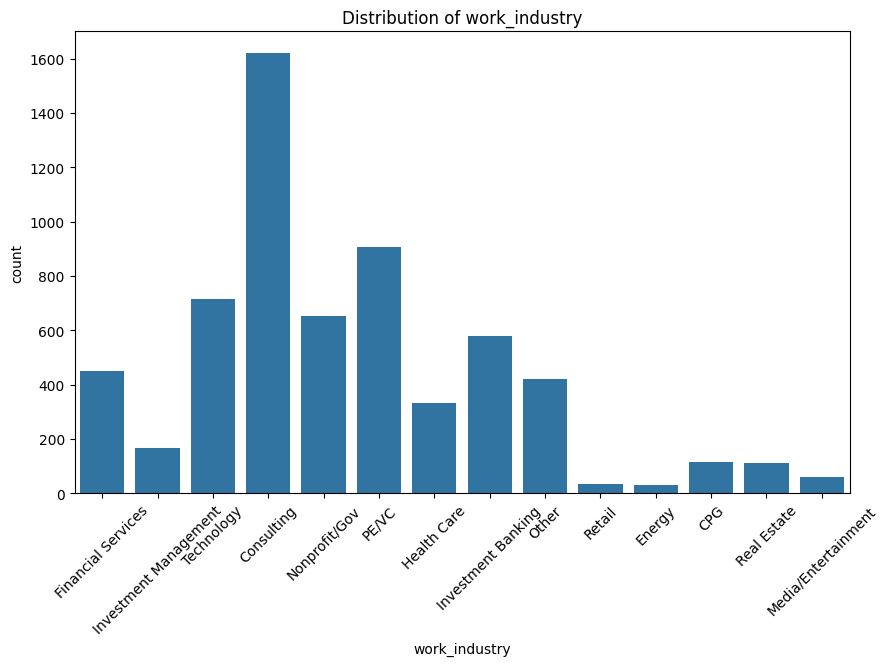

In [ ]:
categorical_cols = ['gender', 'international', 'major', 'race', 'work_industry']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

We also visualize the distribution of the target variable, admission. The target variable has three categories (Admit, Waitlist, Deny), and the distribution is imbalanced, which we need to address later.

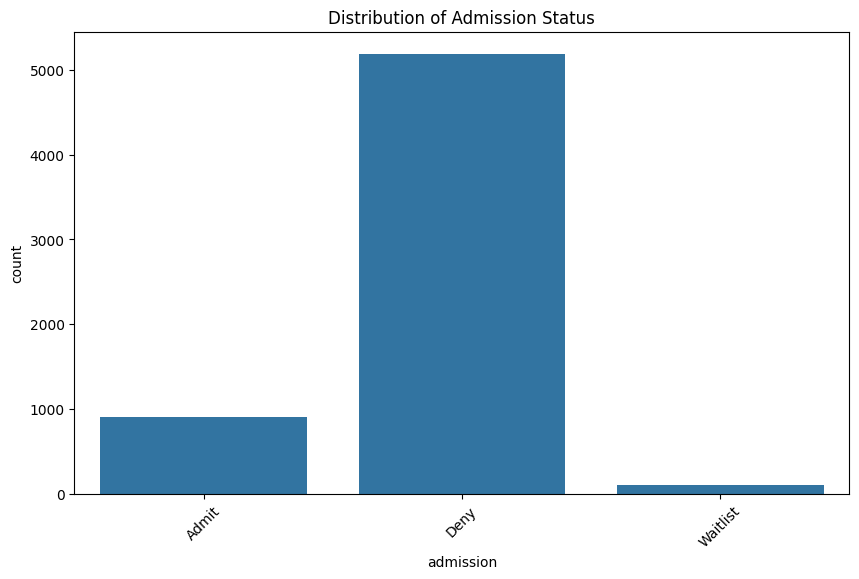

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='admission')
plt.title('Distribution of Admission Status')
plt.xticks(rotation=45)
plt.show()

We obtain summary statistics for all numerical columns. Based on the output below, all three numerical columns have the same counts. However, they have different ranges as they have different units of measurement. To address this, we can check their distributions and standardize them later.

In [ ]:
df.describe()

,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


We visualize the distribution of each numerical variable using histograms and box plots. The histogram includes a kernel density estimate (KDE) for a smoother representation of the distribution. Based on visual inspection, gpa is normally distributed, gmat seems to be slightly right-skewed, and work_exp is normally distributed.

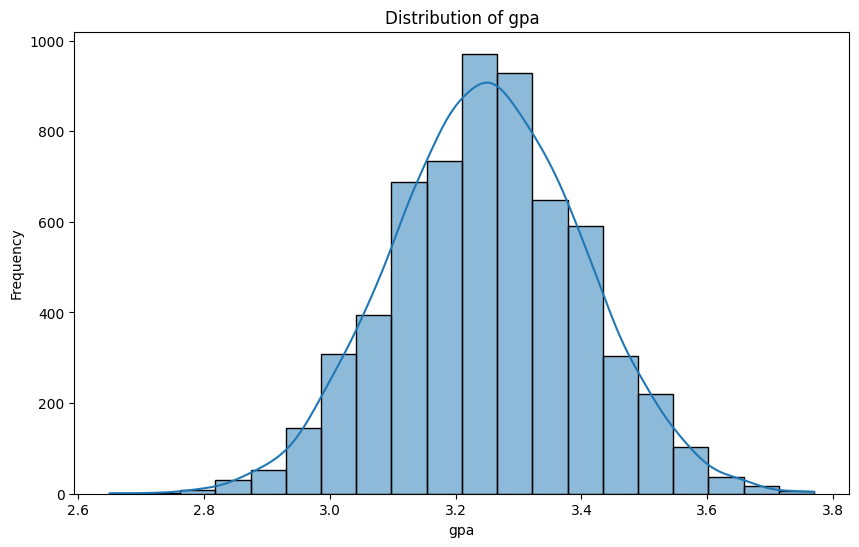

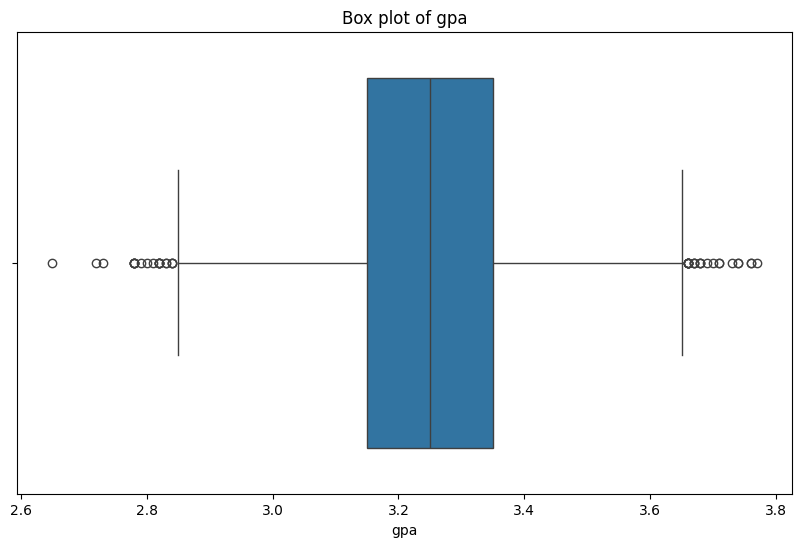

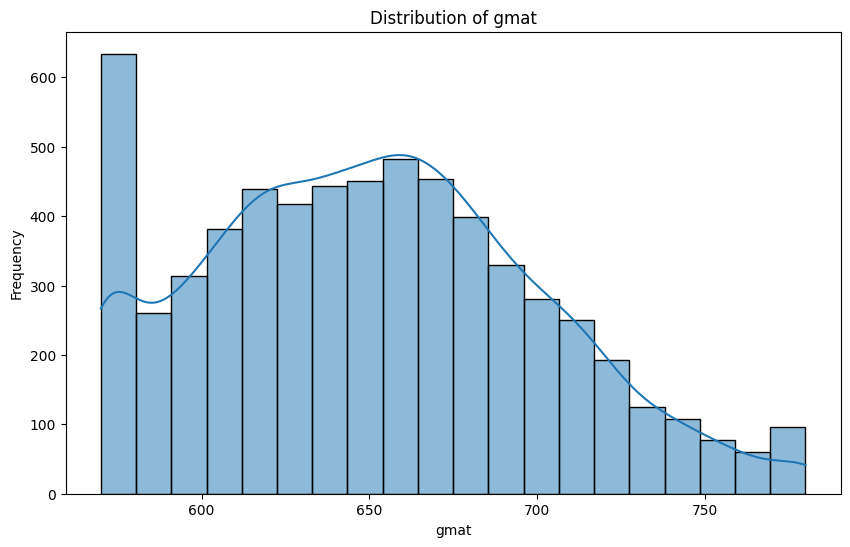

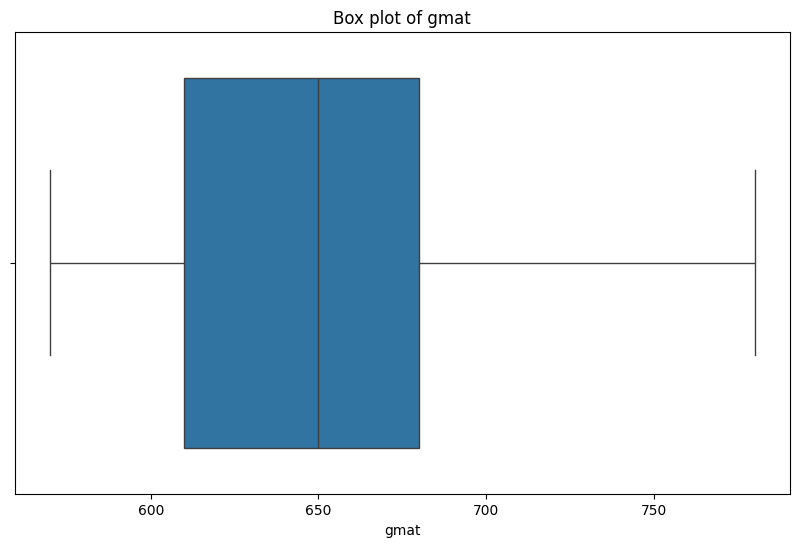

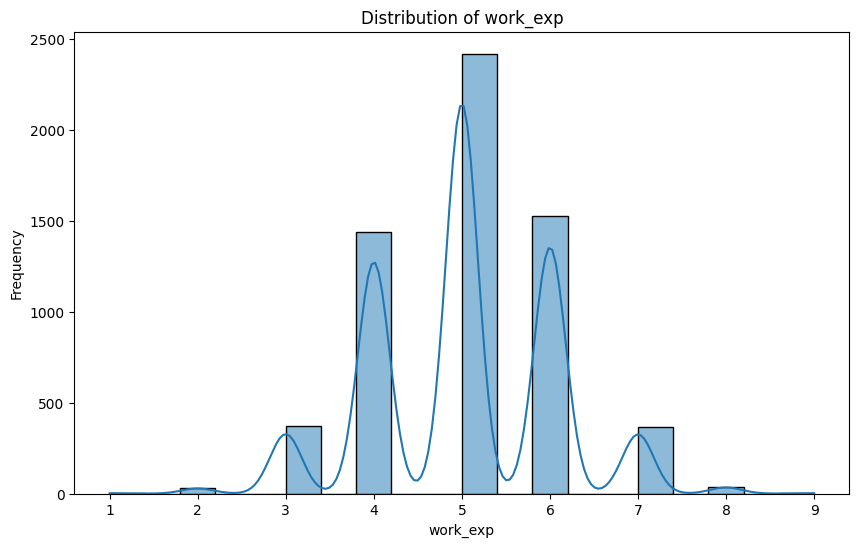

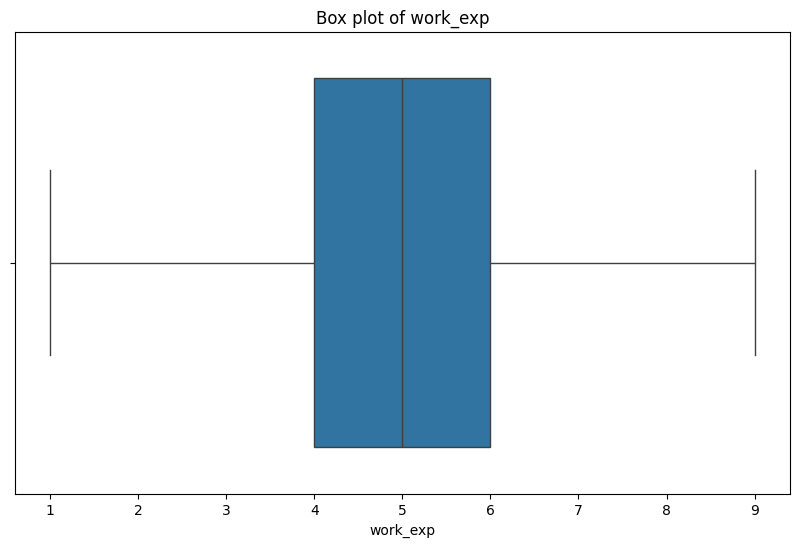

In [ ]:
numerical_cols = ['gpa', 'gmat', 'work_exp']

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=col)
    plt.title(f'Box plot of {col}')
    plt.show()

To further check for normality and skewness, we use shapiro and skew. Based on the output below, the numerical variable gpa is normally distributed and not skewed. gmat is not normally distributed and is slightly right skewed with a wide range of values, so transforming this variable should be considered. work_exp does not seem to be skewed but is actually not normally distributed based on the Shapiro-Wilk test. Unlike gpa and gmat, however, it is a discrete variable, which often does not follow a normal distribution unless they have a very large number of possible values. Since the skewness is close to 0, we can still use work_exp directly in our analyses and models.

In [ ]:
for col in numerical_cols:
    stat, p = shapiro(df[col])
    print(f'{col} - p-value: {p}')
    if p < 0.05:
        print(f"{col} is not normally distributed; consider transformations.")

    col_skewness = skew(df[col])
    print(f'Skewness of {col}: {col_skewness}')

    print('')

gpa - p-value: 0.13479350601398765
Skewness of gpa: -0.0008938600816820171

gmat - p-value: 1.4461165780616892e-30
gmat is not normally distributed; consider transformations.
Skewness of gmat: 0.28871313973929885

work_exp - p-value: 6.7305763078657176e-49
work_exp is not normally distributed; consider transformations.
Skewness of work_exp: -0.014489077651808223



/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6194.
  res = hypotest_fun_out(*samples, **kwds)


### Transforming and standardizing numerical features

We create a new column gmat_log by applying a natural logarithm transformation to the gmat scores. The log transformation is commonly used to stabilize variance and make the data more normally distributed, especially for features like GMAT scores that often have a right-skewed distribution. This transformation can help improve model performance and meet the assumptions of many statistical techniques.

In [ ]:
df['gmat_log'] = np.log(df['gmat'])

Since we will later create a model using numerical features that are on different scales, we standardize these numerical features to maintain consistency. Here, we instantiate a StandardScaler object and apply it to scale the selected numerical columns: gmat_log, gpa, and work_exp. This process standardizes the features by removing the mean and scaling to unit variance. By transforming the features to have a mean of 0 and a standard deviation of 1, we ensure that each feature contributes equally to the distance calculations used in many models.

In [ ]:
scaler = StandardScaler()

columns_to_scale = ['gmat_log', 'gpa', 'work_exp']

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

We generate descriptive statistics again to check the scaling of numerical features: gmat_log, gpa, and work_exp. All three features now have a mean of 0 and a standard deviation of 1.

In [ ]:
df[columns_to_scale].describe()

,gmat_log,gpa,work_exp
count,6.194000e+03,6.194000e+03,6.194000e+03
mean,4.595183e-15,2.567315e-15,3.556155e-16
std,1.000081e+00,1.000081e+00,1.000081e+00
min,-1.728608e+00,-3.964350e+00,-3.891080e+00
25%,-8.279656e-01,-6.646495e-01,-9.850854e-01
50%,1.545343e-02,-4.709292e-03,-1.642070e-02
75%,6.146251e-01,6.552309e-01,9.522441e-01
max,2.436572e+00,3.426980e+00,3.858238e+00


Since we will be using the transformed gmat_log, we can already drop the original gmat variable.

In [ ]:
df = df.drop(['gmat'], axis=1)

# 2. Feature Selection (10 points):
* Implement at least two feature selection methods (e.g., correlation, chi-squared test, mutual information, recursive feature elimination).
* Rank the features based on their importance and select a subset of relevant features.
* Justify your choice of feature selection methods and explain the rationale behind your feature selection.


## Pearson Correlation

Pearson's correlation was conducted on the numeric features to assess the relationships among them. This analysis helps identify any linear associations that may exist within the features themselves, providing insights into multicollinearity and potential redundancy. We visualize the correlation matrix using a heatmap.

Based on the output below, the correlation coefficient between gmat and gpa is 0.58, indicating a moderate positive correlation. This suggests that, in general, as GMAT scores increase, GPA tends to increase as well. While the relationship is not perfect, it implies that higher academic performance in one measure (GPA) is associated with higher performance on the GMAT. However, this moderate correlation does not necessarily indicate multicollinearity if both variables are included in a regression model.  A correlation of 0.58 is notable but not excessively high, suggesting that while GMAT and GPA may overlap in what they measure, it is unlikely to lead to severe multicollinearity issues.





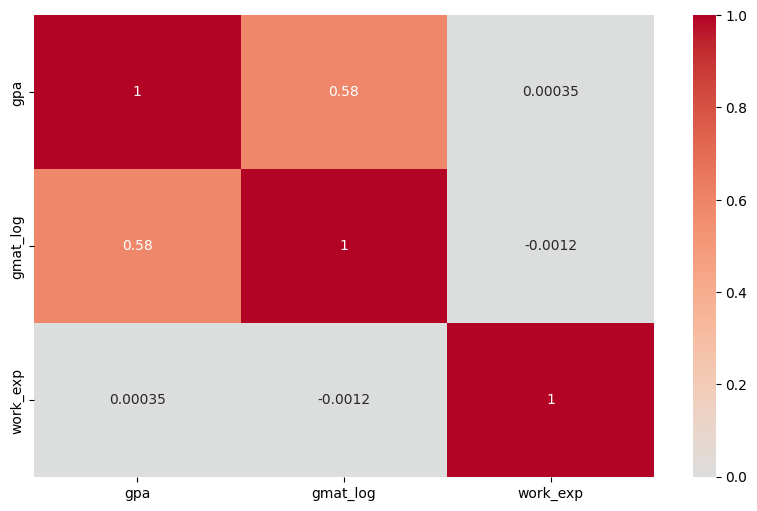

In [ ]:
numeric = ['gpa', 'gmat_log', 'work_exp']

corr = df[numeric].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.show()

## Chi-Squared Test

One method employed for feature selection is the Chi-squared test. This statistical test is particularly useful for evaluating the independence between categorical features and the target variable. By assessing the relationship between each feature and the target, the Chi-squared test helps identify features that have a significant association with the outcome.

For the Chi-squared test, it is important to use the categorical variables in their original form rather than in numeric or encoded formats. This ensures that the test accurately captures the distribution and relationships inherent in the data.

We start by defining the features to test and compare with the target 'admission', which include categorical variables like gender, international status, major, and encoded race and work industry.

In [ ]:
categorical_features = ['gender', 'international', 'major', 'race', 'work_industry']

We then iterate through each categorical feature to conduct a chi-square test. For each feature, we create a contingency table that compares the feature values with the target variable (admission). The chi-square test is then performed on this table, and the resulting statistics—including the chi-square statistic, p-value, degrees of freedom, and expected frequencies—are stored for further analysis.

In [ ]:
results = {}
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['admission'])
    chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    results[feature] = {
        'chi2_stat': chi2_stat,
        'p_value': p_value,
        'dof': dof,
        'expected_freq': expected
    }

We then display the results below. Based on the Chi-squared test results, we can draw several conclusions about the features in relation to the admission status.

Gender shows a strong association with a high chi-squared statistic and a p-value of 1.31e-21, suggesting that it should be retained for further analysis. Similarly, race demonstrates a notable association, with a chi-squared statistic of 107.04 and a very low p-value, indicating its importance in the admission process. In contrast, international status and major exhibit weak associations, with p-values of 0.71 and 0.40, respectively, suggesting these features could be excluded from further consideration. Lastly, work industry also shows no significant relationship, with a p-value of 0.26, indicating it may not contribute valuable information regarding admission outcomes. It is thus recommend retaining gender and race, while other features need further examination.

In [ ]:
for feature, result in results.items():
    print(f"Feature: {feature}")
    print(f"Chi2 Stat: {result['chi2_stat']}, P-Value: {result['p_value']}, Degrees of Freedom: {result['dof']}")
    print("Expected Frequencies:\n", result['expected_freq'])
    print("\n")

Feature: gender
Chi2 Stat: 96.16293493778068, P-Value: 1.3136630861940511e-21, Degrees of Freedom: 2
Expected Frequencies:
 [[ 327.07458831 1887.58379077   36.34162092]
 [ 572.92541169 3306.41620923   63.65837908]]


Feature: international
Chi2 Stat: 0.6771777625905686, P-Value: 0.7127754241704354, Degrees of Freedom: 2
Expected Frequencies:
 [[ 632.35389086 3649.38456571   70.26154343]
 [ 267.64610914 1544.61543429   29.73845657]]


Feature: major
Chi2 Stat: 4.025284181356261, P-Value: 0.40259482252999457, Degrees of Freedom: 4
Expected Frequencies:
 [[ 267.06490152 1541.26122054   29.67387795]
 [ 360.49402648 2080.45108169   40.05489183]
 [ 272.44107201 1572.28769777   30.27123022]]


Feature: race
Chi2 Stat: 102.11387383351361, P-Value: 1.5777031073187402e-18, Degrees of Freedom: 8
Expected Frequencies:
 [[ 245.85082338 1418.83241847   27.31675815]
 [ 186.13174039 1074.18695512   20.68130449]
 [ 109.12173071  629.75363255   12.12463675]
 [  39.23151437  226.40942848    4.35905715]
 

## Encoding of categorical features

For other feature selection methods such as mutual information and recursive feature elimination, we first encode the categorical features because these methods require numeric input to evaluate the relationships between features and the target variable effectively. Since all categorical features in this dataset are nominal and lack inherent order, label encoding is not recommended as it may introduce misleading ordinal relationships. Instead, we will explore alternative encoding methods based on the characteristics of the variables.

The target variable admission is seen to have 3 categories. Since we also want the target variable to be in only one column, we can encode it using LabelEncoder. This transforms the categorical values ('Deny', 'Admit', 'Waitlist') into numerical values (0, 1, 2). Although the categories themselves do not have a natural ordering, this encoding allows the model to process them as distinct classes.

In [ ]:
df['admission'].value_counts()

,count
admission,
Deny,5194
Admit,900
Waitlist,100


In [ ]:
label_encoder = LabelEncoder()
df['admission'] = label_encoder.fit_transform(df['admission'])

Below, we see that the "gender" variable has 2 categories, the "international" variable has 2 categories, and the "major" variable has 3 categories. Since these variables are nominal and lack inherent order, one-hot encoding is appropriate. This method is particularly suitable given that each variable has only a few categories.

In [ ]:
df['gender'].value_counts()

,count
gender,
Male,3943
Female,2251


In [ ]:
df['international'].value_counts()

,count
international,
No,4352
Yes,1842


In [ ]:
df['major'].value_counts()

,count
major,
Humanities,2481
STEM,1875
Business,1838


In [ ]:
df = pd.get_dummies(df, columns=['gender', 'international', 'major'], drop_first=True)

The 'race' feature consists of 5 nominal categories. If we were to apply one-hot encoding, it would significantly increase the dimensionality of our dataset. Instead, we use frequency encoding, which is advantageous for categorical variables with a moderate number of categories. This method retains information about class distribution, which can enhance model performance without introducing a large number of binary features.

In [ ]:
df['race'].value_counts()

,count
race,
White,2200
Asian,1692
Black,1281
Hispanic,751
Other,270


In [ ]:
frequency_encoding = df['race'].value_counts()
df['race_encoded'] = df['race'].map(frequency_encoding)

We apply the same frequency encoding technique to the 'work_industry' feature. With 14 distinct categories, frequency encoding helps us efficiently represent this variable without generating excessive columns, maintaining the balance between model complexity and interpretability. By mapping each industry to its count, we also provide the model with insight into the relative prevalence of each category.

In [ ]:
df['work_industry'].value_counts()

,count
work_industry,
Consulting,1619
PE/VC,907
Technology,716
Nonprofit/Gov,651
Investment Banking,580
Financial Services,451
Other,421
Health Care,334
Investment Management,166


In [ ]:
frequency_encoding = df['work_industry'].value_counts()
df['work_industry_encoded'] = df['work_industry'].map(frequency_encoding)

After encoding, we choose to drop the original categorical columns 'race' and 'work_industry' from the DataFrame. This decision is made to eliminate redundancy and ensure that our dataset is clean and ready for modeling. Retaining only the encoded columns reduces potential confusion during model training and aligns with best practices for feature engineering.

In [ ]:
df = df.drop(columns=['race', 'work_industry'])

Checking the DataFrame, all variables have already been preprocessed and encoded correctly.

In [ ]:
df.head()

,gpa,work_exp,admission,gmat_log,gender_Male,international_Yes,major_Humanities,major_STEM,race_encoded,work_industry_encoded
0,0.325261,-1.953750,0,-0.612036,False,False,False,False,1692,451
1,0.193273,-0.016421,1,0.614625,True,False,True,False,1281,166
2,0.325261,-0.016421,0,1.187925,False,True,False,False,1692,716
3,1.447159,0.952244,1,0.808488,True,False,False,True,1281,716
4,0.655231,-0.016421,1,-1.270653,True,False,False,True,751,1619


## Mutual Information

Mutual information was conducted to evaluate the dependency between both categorical and numeric features and the target variable, admission. This measure quantifies the amount of information gained about one variable through the other, providing insights into both linear and nonlinear relationships.

By applying mutual information, we can assess the relevance of all feature types in predicting the target variable. This is particularly valuable because it allows us to identify features that contribute significant information toward understanding admission outcomes, regardless of their type.

We begin by preparing the dataset for mutual information calculation. The features are separated from the target variable, 'admission', and the data is split into training and testing sets. This step ensures that we can evaluate the model's performance on unseen data later on. The use of train_test_split also helps to mitigate overfitting by providing an independent test set.

In [ ]:
X = df.drop('admission', axis=1)
y = df['admission']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We calculate mutual information using the mutual_info_classif function, which measures the amount of information that each feature provides about the target variable.

In [ ]:
mutual_info = mutual_info_classif(X_train, y_train)

The resulting values are compiled into a DataFrame, mutual_info_df, and sorted in descending order to highlight the most informative features.

The mutual information results indicate varying levels of relevance among the features in relation to the admission status.

The 'gmat_log' and 'gpa' features show the highest mutual information values, suggesting they have a meaningful contribution to predicting admission outcomes. These features are strong candidates for inclusion in the model.

In contrast, features such as 'gender_Male,' 'race_encoded,' and 'work_exp' exhibit low mutual information values, indicating a weak association with admission. While they may still provide some value, their impact appears limited. We can compare their scores using another method later.

The features 'international_Yes,' 'major_Humanities', 'major_STEM,' and 'work_industry_encoded' show negligible or zero mutual information, suggesting they do not contribute meaningful information for predicting admission. As such, these features may be candidates for exclusion from further analysis.

In [ ]:
mutual_info_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mutual_info})
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)
mutual_info_df

,Feature,Mutual Information
2,gmat_log,0.076363
0,gpa,0.047816
7,race_encoded,0.014613
1,work_exp,0.006603
5,major_Humanities,0.006000
3,gender_Male,0.005729
4,international_Yes,0.000000
6,major_STEM,0.000000
8,work_industry_encoded,0.000000


## Recursive Feature Elimination

Recursive Feature Elimination (RFE) and its cross-validated variant (RFECV) were conducted to systematically identify the most relevant features for predicting the admission status. RFE works by recursively removing the least important features based on model performance, allowing us to determine which features contribute the most to the model's accuracy

We start by initializing a RandomForestClassifier as the estimator for RFE. The choice of a Random Forest model is particularly effective here due to its ability to handle feature importance through ensemble learning. Given that our dataset includes both numerical and categorical variables, Random Forest can also accommodate these characteristics without requiring extensive preprocessing. We set the parameter n_features_to_select to 0.8, meaning we aim to retain 80% of the features based on their importance as determined by the model. The step parameter is set to 1, indicating that RFE will remove one feature at a time during the selection process.

In [ ]:
model = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=model, n_features_to_select=0.8, step=1)
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=0.8)

We compile the results of RFE into a DataFrame, rfe_df, which includes the features, a boolean indicator of whether they were selected, and their ranking based on importance. The DataFrame is then sorted by ranking to easily identify the selected features.

The results from Recursive Feature Elimination (RFE) indicate that several features, including 'gpa,' 'work_exp,' 'gmat_log,' 'gender_Male,' 'major_Humanities,' 'race_encoded,' and 'work_industry_encoded,' were selected as important predictors of admission status, all receiving a ranking of 1.

This aligns with the mutual information findings, where 'gpa' and 'gmat_log' showed the highest levels of association with admission. The inclusion of 'work_exp' and 'gender_Male' suggests their relevance, despite their lower mutual information values, highlighting the utility of RFE in capturing feature importance beyond correlation metrics.

Conversely, 'international_Yes' and 'major_STEM' were not selected, consistent with their low mutual information values, indicating they do not significantly contribute to predicting admission outcomes.

Moreover, although 'work_industry_encoded' had a low mutual information score, it is a selected feature using RFE.

In [ ]:
rfe_df = pd.DataFrame({'Feature': X.columns, 'Selected': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df = rfe_df.sort_values(by='Ranking')
rfe_df

,Feature,Selected,Ranking
0,gpa,True,1
1,work_exp,True,1
2,gmat_log,True,1
3,gender_Male,True,1
5,major_Humanities,True,1
7,race_encoded,True,1
8,work_industry_encoded,True,1
4,international_Yes,False,2
6,major_STEM,False,3


We also try to incorporate cross-validation in the RFE. In RFECV, for each iteration, the model is validated using cross-validation, ensuring that the features selected not only perform well on the training set but also generalize effectively to unseen data. RandomForestClassifier is the base estimator chosen due to its effectiveness in handling complex datasets and its inherent capability to evaluate feature importance.

In [ ]:
model = RandomForestClassifier(random_state=42)
rfecv = RFECV(estimator=model, step=1, cv=5)
rfecv.fit(X_train, y_train)

RFECV(cv=5, estimator=RandomForestClassifier(random_state=42))

We compile the results from RFECV into a DataFrame, rfecv_df, which includes the features, a boolean indicator of whether they were selected, and their ranking. This DataFrame is sorted by ranking to easily identify which features have been retained.

The RFECV results show that only the 'gpa' feature was selected as significant, ranking first. This aligns with the mutual information findings, where 'gpa' demonstrated high relevance. Notably, other features, including 'gmat_log,' 'work_industry_encoded,' 'work_exp,' 'race_encoded,' 'major_Humanities,' 'gender_Male,' 'international_Yes,' and 'major_STEM', were not selected.

In [ ]:
rfecv_df = pd.DataFrame({'Feature': X.columns, 'Selected': rfecv.support_, 'Ranking': rfecv.ranking_})
rfecv_df = rfecv_df.sort_values(by='Ranking')
rfecv_df

,Feature,Selected,Ranking
0,gpa,True,1
2,gmat_log,False,2
8,work_industry_encoded,False,3
1,work_exp,False,4
7,race_encoded,False,5
5,major_Humanities,False,6
3,gender_Male,False,7
4,international_Yes,False,8
6,major_STEM,False,9


Here, we extract the mean cross-validation scores from the RFECV results. The cv_results_ attribute contains detailed information about the cross-validation performance for each subset of features evaluated during the RFECV process. Specifically, we focus on the mean_test_score, which provides the average score achieved by the model during cross-validation for each number of features.

Examining the results, having just 1 feature or having 7 features yielded the same, highest CV score. However, relying solely on this single feature may not produce a sufficiently robust model. Therefore, it is worth considering having 7 features, meaning that those in the next ranks are considered until 7 features are included. From rfecv_df above, this means selecting gpa, gmat_log, work_industry_encoded, work_exp, race_encoded, major_Humanities, and gender_Male. Only international_Yes and major_STEM are excluded. Including a broader range of features could enhance the model's predictive power and provide a more meaningful understanding of the factors influencing admission outcomes.

In [ ]:
cv_scores = rfecv.cv_results_['mean_test_score']

cv_scores_df = pd.DataFrame({'Number of Features': range(1, len(cv_scores) + 1), 'CV Score': cv_scores})
cv_scores_df

,Number of Features,CV Score
0,1,0.838951
1,2,0.815136
2,3,0.815136
3,4,0.814127
4,5,0.832694
5,6,0.835923
6,7,0.838951
7,8,0.832896
8,9,0.830878


## Interpretation

Based on the various analyses conducted—Pearson correlation, Chi-squared tests, mutual information and recursive feature elimination (RFE)–several features can be considered for selection or elimination.

Key features to select include gpa and gmat_log, which consistently ranks among the most important predictors in mutual information and RFE.
Even if their correlation coefficient is 0.58, it does not necessarily indicate multicollinearity if both variables are included in a regression model.

In mutual information and RFECV, only international_Yes and major_STEM are consistent to be in the bottom of the rankings of feature importance. major and international were also shown to have high p-values in the Chi-squared test when compared with the target variable admission. This implies that there is no statistically significant association between these features and admission outcomes. We can consider eliminating these features as they exhibit low importance and weak associations across various metrics, indicating that they do not significantly contribute to predicting admission outcomes. As for work_industry, even if it also has a low mutual information score, it was included in RFE and even had a high rank of 3 in RFECV, so we can retain it. The other features that are usually in the middle can still be included as they could enhance the model's predictive power.

Hence, two features we can eliminate from the model are international_Yes and major_STEM.

# 3. Handling Imbalanced Data (10 points):
* Analyze the class distribution and identify if the dataset is imbalanced.
* Implement at least two techniques to handle imbalanced data (e.g., oversampling, undersampling, SMOTE, class weighting).
* Evaluate the impact of these techniques on the model's performance.

## Analyzing class distribution

We begin by visualizing the distribution of the target variable, admission, using a count plot. This visualization helps us assess whether the dataset is imbalanced. Analyzing class distribution is crucial, as imbalanced datasets can lead to biased model predictions, favoring the majority class.

As seen below, the admission data shows the following distribution: 5,194 instances of 1 or Deny, 900 instances of 0 or Admit, and 100 instances of 2 or Waitlist. This distribution indicates a significant class imbalance, as the majority class (Deny) vastly outnumbers the other classes.

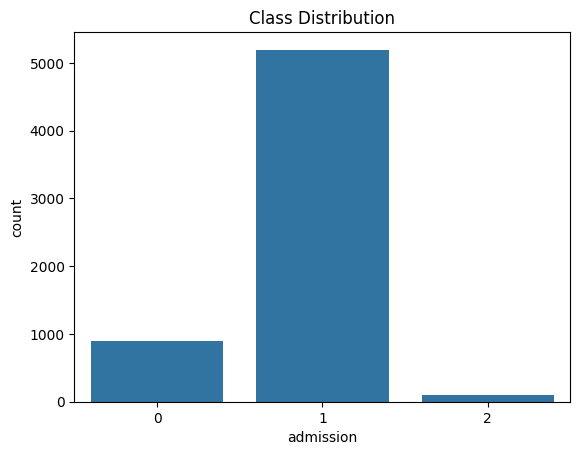

admission
1    5194
0     900
2     100
Name: count, dtype: int64


In [ ]:
sns.countplot(x='admission', data=df)
plt.title('Class Distribution')
plt.show()

print(df['admission'].value_counts())

Next, we split the dataset into features (X) and the target variable (y). This separation is essential for preparing the data for modeling, allowing us to apply techniques specifically to the target variable.

In [ ]:
X = df.drop('admission', axis=1)
y = df['admission']

## Original Data Model Performance

In order to evaluate the impact of techniques to handle imbalanced data, we look at the model performance of the original data to compare with later.

As we can see below, the original data performance indicates generally low model effectiveness across all classes. This highlights significant challenges in the model's ability to classify instances accurately, especially for the minority class, suggesting a need for improvement in model training and handling class imbalance.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_original = RandomForestClassifier(random_state=42)
model_original.fit(X_train, y_train)
y_pred_original = model_original.predict(X_test)

print("Original Data Performance:")
print(classification_report(y_test, y_pred_original))

Original Data Performance:
              precision    recall  f1-score   support

           0       0.46      0.30      0.36       196
           1       0.86      0.94      0.90      1025
           2       0.00      0.00      0.00        18

    accuracy                           0.82      1239
   macro avg       0.44      0.41      0.42      1239
weighted avg       0.79      0.82      0.80      1239



## Oversampling Technique

We then implement Random Oversampling using RandomOverSampler to address the class imbalance. This method increases the number of instances in the minority class by duplicating existing samples, effectively balancing the class distribution. This step is vital for ensuring that our model has sufficient data to learn from both classes.

In [ ]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

By printing the original and resampled class distributions, we can quantitatively evaluate the impact of oversampling. This comparison helps confirm that our technique successfully addresses the imbalance, leading to a more balanced dataset.

In [ ]:
print("Original class distribution:", y.value_counts())
print("Resampled class distribution:", y_resampled.value_counts())

Original class distribution: admission
1    5194
0     900
2     100
Name: count, dtype: int64
Resampled class distribution: admission
0    5194
1    5194
2    5194
Name: count, dtype: int64


As we want to evaluate the model's performance on the oversampled data, we first split it into training and testing sets, then train the model and assess its effectiveness. We view the classification report to evaluate the model's performance on the oversampled data.

As we can see below, the oversampled data performance demonstrates a significant enhancement in model accuracy across all classes compared to the original data. The improvements in precision, recall, and F1 scores indicate that the model is now capable of effectively classifying instances, particularly for the previously neglected class 2.

In [ ]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

model_oversampled = RandomForestClassifier(random_state=42)
model_oversampled.fit(X_train_resampled, y_train_resampled)
y_pred_oversampled = model_oversampled.predict(X_test_resampled)

print("\nOversampled Data Performance:")
print(classification_report(y_test_resampled, y_pred_oversampled))


Oversampled Data Performance:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1095
           1       1.00      0.88      0.93      1019
           2       1.00      1.00      1.00      1003

    accuracy                           0.96      3117
   macro avg       0.96      0.96      0.96      3117
weighted avg       0.96      0.96      0.96      3117



We can also visualize the effects of Random Oversampling by plotting gpa against gmat_log before and after the resampling. These scatter plots provide a visual representation of how the class distribution changes in the feature space, allowing us to understand the effectiveness of the oversampling technique in enhancing the minority class representation.

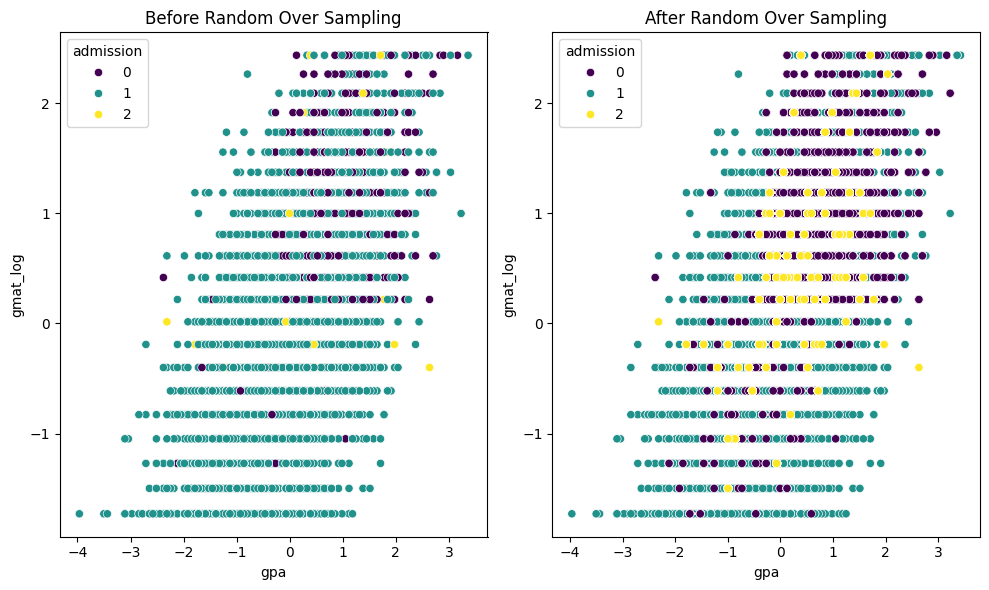

In [ ]:
fig, axes = plt.subplots(figsize=(10, 6), ncols=2)

sns.scatterplot(x=X_train['gpa'], y=X_train['gmat_log'], hue=y_train, ax=axes[0], palette='viridis')
axes[0].set_title('Before Random Over Sampling')

sns.scatterplot(x=X_resampled['gpa'], y=X_resampled['gmat_log'], hue=y_resampled, ax=axes[1], palette='viridis')
axes[1].set_title('After Random Over Sampling')

plt.tight_layout()
plt.show()

## SMOTE

We also try SMOTE (Synthetic Minority Over-sampling Technique) using the SMOTE class to tackle class imbalance. This method generates synthetic samples for the minority class by interpolating between existing instances, thereby enhancing the representation of that class. By doing so, SMOTE effectively balances the class distribution and provides the model with a richer dataset to learn from. This step is crucial for improving the model's ability to recognize and predict instances of the minority class.

In [ ]:
smote = SMOTE(k_neighbors=5, random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X, y)

By printing the original and resampled class distributions, we can quantitatively evaluate the impact of SMOTE. This comparison helps confirm that our technique successfully addresses the imbalance, leading to a more balanced dataset.

In [ ]:
print("Original class distribution:", y.value_counts())
print("SMOTE class distribution:", y_resampled_smote.value_counts())

Original class distribution: admission
1    5194
0     900
2     100
Name: count, dtype: int64
SMOTE class distribution: admission
0    5194
1    5194
2    5194
Name: count, dtype: int64


As we want to evaluate the model's performance on the SMOTE data, we first split it into training and testing sets, then train the model and assess its effectiveness. We view the classification report to evaluate the model's performance on the SMOTE data.

As we can see below, the SMOTE data performance also demonstrates a significant enhancement in model accuracy across all classes compared to the original data. The improvements in precision, recall, and F1 scores indicate that the model is now capable of effectively classifying instances, particularly for the previously neglected class 2.

In [ ]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_resampled_smote, y_resampled_smote, test_size=0.2, random_state=42)

model_smote = RandomForestClassifier(random_state=42)
model_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = model_smote.predict(X_test_smote)

print("\nSMOTE Data Performance:")
print(classification_report(y_test_smote, y_pred_smote))


SMOTE Data Performance:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1095
           1       0.92      0.86      0.89      1019
           2       0.97      0.98      0.97      1003

    accuracy                           0.92      3117
   macro avg       0.92      0.92      0.92      3117
weighted avg       0.92      0.92      0.92      3117



We can also visualize the effects of SMOTE by plotting gpa against gmat_log before and after the resampling. These scatter plots provide a visual representation of how the class distribution changes in the feature space, allowing us to understand the effectiveness of the SMOTE technique in enhancing the minority class representation.

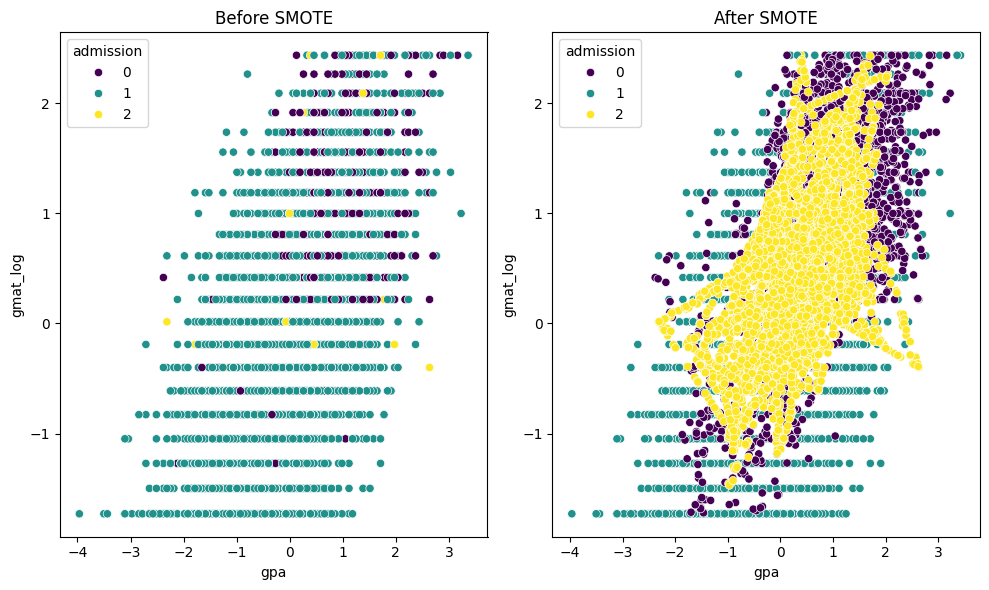

In [ ]:
fig, axes = plt.subplots(figsize=(10, 6), ncols=2)

sns.scatterplot(x=X_train['gpa'], y=X_train['gmat_log'], hue=y_train, ax=axes[0], palette='viridis')
axes[0].set_title('Before SMOTE')

sns.scatterplot(x=X_resampled_smote['gpa'], y=X_resampled_smote['gmat_log'], hue=y_resampled_smote, ax=axes[1], palette='viridis')
axes[1].set_title('After SMOTE')

plt.tight_layout()
plt.show()

## Interpretation

When comparing the model performances from the SMOTE and oversampling techniques, both approaches yielded good results. The oversampling method achieved slightly higher precision and recall for Class 0 and Class 2, demonstrating its effectiveness in addressing class imbalance. However, while SMOTE showed marginally lower metrics for these classes, it still maintained strong performance across all categories, particularly with Class 2 achieving nearly perfect scores.

Despite the better results from the oversampling method, SMOTE can be preferred for some reasons. One major concern with oversampling is the risk of overfitting. Since this method simply duplicates existing instances of the minority class, the model may learn to memorize these repeated samples rather than generalizing from a more varied dataset. This memorization can lead to poor performance on unseen data, as the model becomes overly sensitive to the specific instances it was trained on.

In contrast, SMOTE generates synthetic samples by interpolating between existing instances. This adds variability and diversity to the training data, reducing the risk of overfitting. Additionally, SMOTE's approach allows for a more nuanced representation of the minority class, potentially leading to better generalization.

In summary, while both methods performed well, the advantages of SMOTE in enhancing data diversity and mitigating overfitting risks make it the preferred choice for creating a more robust and effective model.

# 4. BONUS: Model Building and Evaluation (10 points):
* Build a classification model (e.g., logistic regression, random forest, support vector machine) using the selected features and balanced dataset.
* Evaluate the model's performance using appropriate metrics (e.g., accuracy, precision, recall, F1-score,
ROC curve).
* Discuss the strengths and weaknesses of the chosen model and suggest potential improvements.


We define the feature set by excluding major_STEM and international_Yes, based on the feature selection techniques, and apply SMOTE to balance the dataset, based on the resampling techniques. We split the SMOTE resampled data into training and testing sets.



In [ ]:
X = df.drop(columns=['admission', 'international_Yes', 'major_STEM'], axis=1)
y = df['admission']

X_train, X_test, y_train, y_test = train_test_split(X_resampled_smote, y_resampled_smote, test_size=0.2, random_state=42)

We initialize the Random Forest classifer and train it on the training data.

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Then we can use the trained model to predict outcomes on the test set.

In [ ]:
y_pred = model.predict(X_test)

To evaluate the model's performance, we print the classification report, which includes precision, recall, and F1-score for each class, along with overall accuracy.

In [ ]:
print("\nClassification Report (precision, recall, F1-score):")
print(classification_report(y_test, y_pred, target_names=['Admit', 'Deny', 'Waitlist']))


Classification Report (precision, recall, F1-score):
              precision    recall  f1-score   support

       Admit       0.88      0.92      0.90      1095
        Deny       0.92      0.86      0.89      1019
    Waitlist       0.97      0.98      0.97      1003

    accuracy                           0.92      3117
   macro avg       0.92      0.92      0.92      3117
weighted avg       0.92      0.92      0.92      3117



The classification report indicates that the Random Forest model is effective in predicting admission outcomes, achieving an overall accuracy of 0.92. This high accuracy suggests that the model correctly classifies a significant majority of candidates across all categories. In the admit category, the model has a precision of 0.88 and a recall of 0.92, indicating it successfully identifies most candidates who should be admitted, though the lower precision suggests some admitted candidates may not meet the criteria, highlighting the need for additional reviews. For the deny class, the model achieves a precision of 0.92 and a recall of 0.86, demonstrating strong performance in identifying candidates who should not be admitted, while missing some qualified individuals. The waitlist category performs exceptionally well with a precision of 0.97 and a recall of 0.98, indicating that the model reliably identifies candidates suitable for the waitlist.

The Random Forest classifier has several strengths, including its robustness to overfitting, especially in complex datasets, and its ability to handle a mix of numerical and categorical features effectively. It also helps identify which features are most important for making predictions. However, it has some weaknesses. The model can be difficult to understand, making it hard to know why it makes certain decisions. It can also be slow when working with large datasets. To improve the model, its settings can be adjusted to find the best fit for the data. Creating new features or reducing the number of features could also enhance performance, like what was done in this process.